In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

In [2]:
location = 'Taipei101_30m'
floor = 'B3'
data = 'full'
total_df = pd.read_csv('/root/Mag/OriginalData/Taipei101/Survey/20220315_101_B3/location_20220315_101_POINT1_FSTREET/magSim3/Mag_0_new@20220315152643.csv')

In [3]:
total_df.loc[:,'lat']

0        25.034588
1        25.034588
2        25.034588
3        25.034588
4        25.034588
           ...    
16205    25.034588
16206    25.034588
16207    25.034588
16208    25.034588
16209    25.034588
Name: lat, Length: 16210, dtype: float64

In [4]:
def calculate_Para(start_wgs84: tuple([float, float])):
    wgs84_a = 6378137.0
    wgs84_b = 6356752.3142
    wgs84_e2 = (1 - (wgs84_b / wgs84_a) * (wgs84_b / wgs84_a))
    R3 = np.power((1.0 - wgs84_e2 * np.power(np.sin(start_wgs84[0]), 2)), 3)
    R2 = np.power(np.sin(start_wgs84[0]), 2)
    
    high = 0
    Lat2Y = high + wgs84_a * (1 - wgs84_e2) / np.sqrt(R3)
    Lon2X = (high + wgs84_a / np.sqrt(1 - wgs84_e2 * R2)) * np.cos(start_wgs84[0])
    
    return Lat2Y, Lon2X

class PositionConverter:
    def __init__(self, original_position):
        self.original_position = original_position
    
    def execute(self, lat: list[float], lon: list[float]):
        assert len(lat) == len(lon)
        
        start_wgs84 = np.deg2rad([self.original_position[0], self.original_position[1]])  # start_wgs84: 自訂原點座標(經緯度)
        Lat2Y, Lon2X = calculate_Para(start_wgs84)

        converted_y = (np.deg2rad(lat) - start_wgs84[0]) * Lat2Y
        converted_x = (np.deg2rad(lon) - start_wgs84[1]) * Lon2X

        return converted_y, converted_x

In [5]:
position_converter = PositionConverter(original_position=(total_df.lat.min(), total_df.lon.min()))
converted_y, converted_x = position_converter.execute(total_df.lat, total_df.lon)
total_df['cord_y'] = converted_y
total_df['cord_x'] = converted_x

In [6]:
total_df

,UTC,magN,magE,magD,lat,lon,height,roll,pitch,heading,LL_Heading,cord_y,cord_x
0,1.647330e+09,35.418838,-14.338351,38.914406,25.034588,121.564451,-2.556613,0.056288,0.335724,-0.131932,0.0,95.043567,41.378230
1,1.647330e+09,35.371973,-14.273746,38.985613,25.034588,121.564451,-2.556039,0.053892,0.335595,-0.130811,0.0,95.043567,41.378230
2,1.647330e+09,35.274538,-14.344975,38.901635,25.034588,121.564451,-2.555308,0.049931,0.334084,-0.129400,0.0,95.043567,41.378230
3,1.647330e+09,35.275964,-14.375443,38.866333,25.034588,121.564451,-2.554493,0.046161,0.331541,-0.127446,0.0,95.043567,41.378230
4,1.647330e+09,35.299272,-14.357606,39.000529,25.034588,121.564451,-2.553695,0.044219,0.328905,-0.124997,0.0,95.043567,41.378230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16205,1.647329e+09,35.541831,-7.602157,39.103541,25.034588,121.564454,0.013703,0.017637,0.376579,-2.976476,0.0,95.043567,41.680998
16206,1.647329e+09,35.316664,-7.616803,39.001893,25.034588,121.564454,0.013302,0.016435,0.376263,-2.976905,0.0,95.043567,41.680998
16207,1.647329e+09,35.339461,-7.785402,38.881164,25.034588,121.564454,0.012957,0.014871,0.375718,-2.977346,0.0,95.043567,41.680998
16208,1.647329e+09,35.413240,-7.984600,38.777743,25.034588,121.564454,0.012631,0.013022,0.375329,-2.978112,0.0,95.043567,41.680998


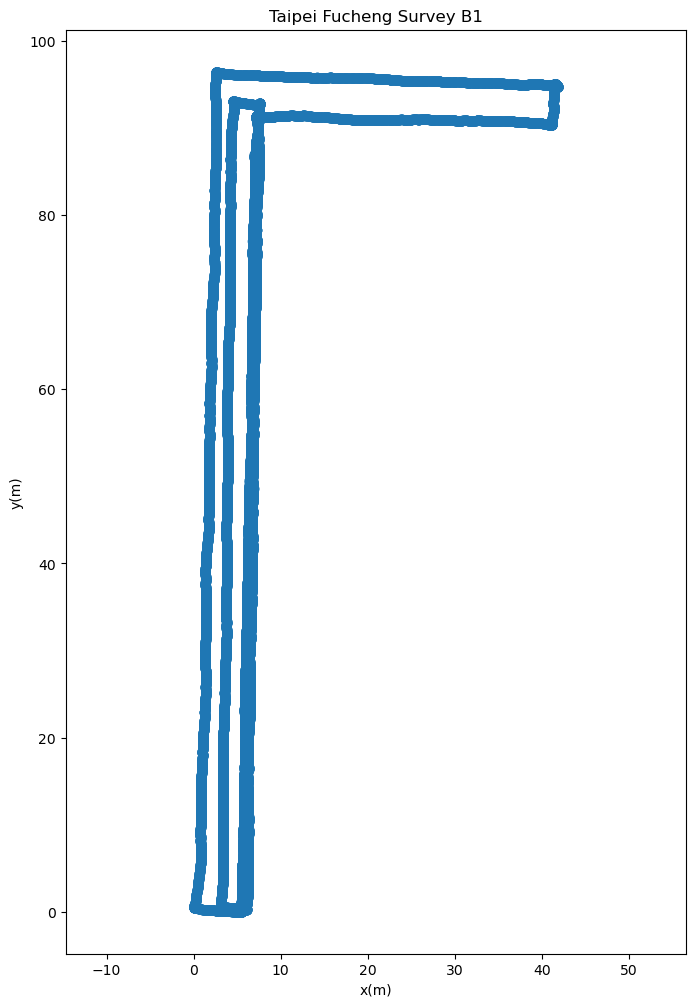

In [7]:
plt.figure(figsize=(8, 12))
plt.scatter(total_df.cord_x, total_df.cord_y)
plt.title(f'Taipei Fucheng Survey B1')
plt.axis('equal')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.show()

In [8]:
import ipywidgets as widgets

In [ ]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['r', 'y'])
    time.sleep(1)

In [16]:
def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()

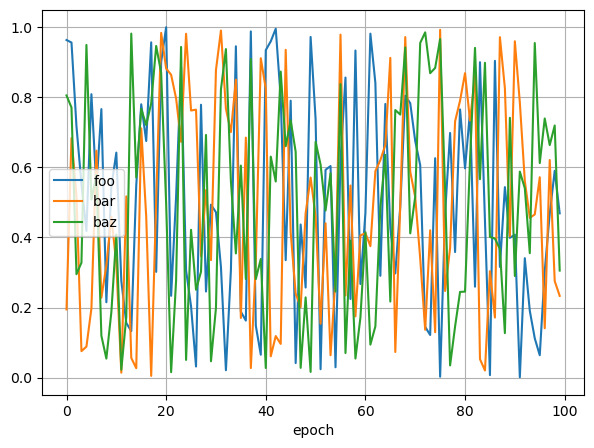

In [17]:
data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

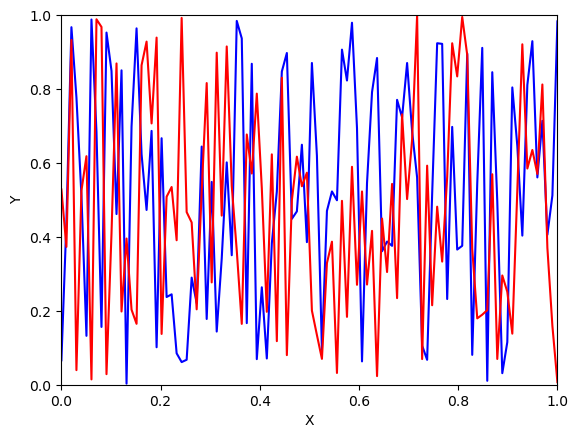

In [53]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import time

from IPython import display

def pltsin(ax, *,hdisplay, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    hdisplay.update(fig)


fig, ax = plt.subplots(1,1)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    time.sleep(1)
    
plt.close(fig)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


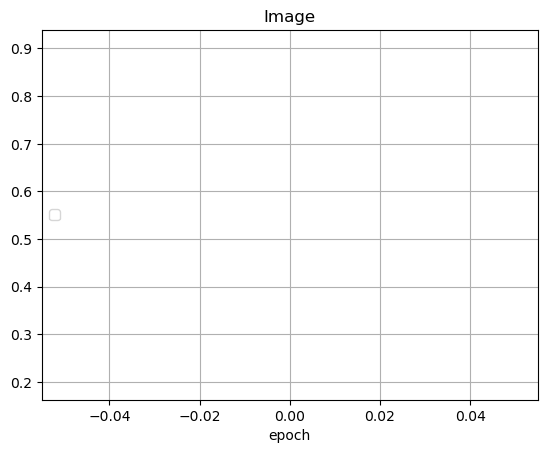

In [15]:
import collections

from IPython.display import Markdown, clear_output
from IPython import display
import ipywidgets as widgets


def live_plot(data_dict, figsize=(7,5)):
    clear_output(wait=True)
    
    for label, data in data_dict.items():
        ax.plot(data, label=label)
    
    hdisplay.update(fig)

fig, ax = plt.subplots(1, 1)
ax.set_title('Image')
ax.grid(True)
ax.set_xlabel('epoch')
ax.legend(loc='center left') # the plot evolves to the right
hdisplay = display.display("", display_id=True)

data = collections.defaultdict(list)

yes_button = widgets.Button(description='Yes')
no_button = widgets.Button(description='No')
output = widgets.Output()

def activate():
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

def on_yes_button_clicked(_):
    activate()
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('Yes')
        
def on_no_button_clicked(_):
    activate()
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('No')
        
yes_button.on_click(on_yes_button_clicked)
no_button.on_click(on_no_button_clicked)

activate()
widgets.VBox([widgets.HBox([yes_button, no_button]), output])

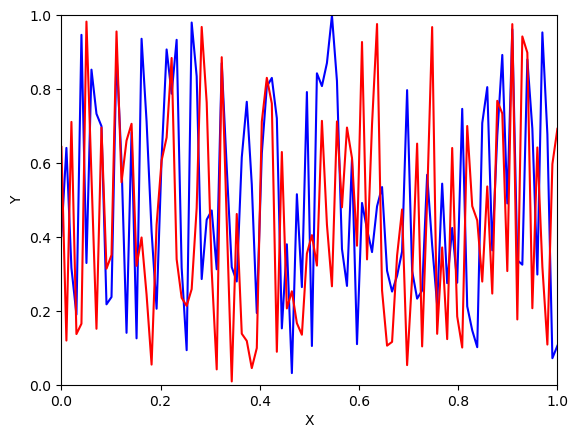

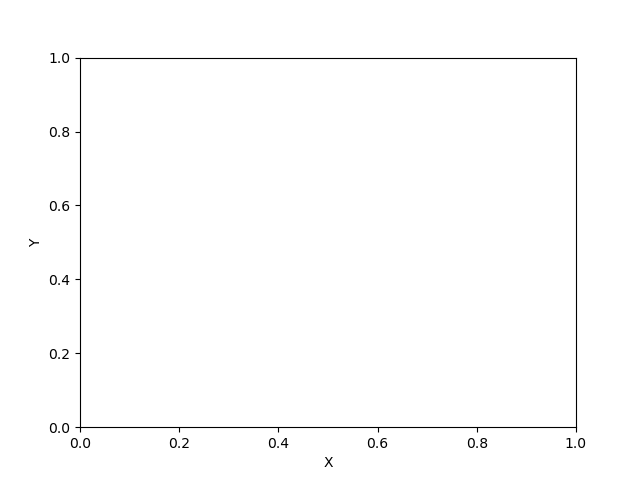

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import time

from IPython.display import Markdown, clear_output
from IPython import display
import ipywidgets as widgets

def pltsin(ax, *,hdisplay, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
            
    hdisplay.update(fig)


fig, ax = plt.subplots(1, 1)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
    
def on_yes_button_clicked(_):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('Yes')
        
def on_no_button_clicked(_):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('No')


yes_button = widgets.Button(description='Yes')
no_button = widgets.Button(description='No')
output = widgets.Output()
    
yes_button.on_click(on_yes_button_clicked)
no_button.on_click(on_no_button_clicked)

In [3]:
widgets.VBox([widgets.HBox([yes_button, no_button]), output])